In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


# Context

***STAKEHOLDER*** : King Property Services (property managment company)

***BUSINESS PROBLEM*** : King Property Services (KPS)  wants to acquire new properties that will appeal to recent college graduates / young professionals. They want to better understand how different property characteristics influence the prices of properties that might appeal to this target demographic
  

# Obtain / Scrub

In [5]:
df = pd.read_csv('data/kc_house_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Initial Observations** 

1) Columns with null data:
- waterfront
- yr_renovated
- view

2) sqft_basement is a string when it should probably be an int or float 

3) date column is not in datetime 

In [120]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [121]:
df['waterfront'].isna().value_counts()

False    19221
True      2376
Name: waterfront, dtype: int64

Over 2,000 null values
- this data could be filled given the distribution of waterfront properties 
    - Initially I feel like 2,000 is too much to replace 

In [122]:
#replacing null values based on the existing distribution of data from 'waterfront'
waterfront_dist = df['waterfront'].value_counts(normalize=True)
waterfront_na = df['waterfront'].isna()

df.loc[waterfront_na,'waterfront'] = np.random.choice(waterfront_dist.index, size=len(df[waterfront_na]), p=waterfront_dist.values)

In [123]:
# no more null values
# df['waterfront'].isna().value_counts()

In [124]:
# new values
# df['waterfront'].value_counts()

In [125]:
df['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

In [126]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [127]:
df['yr_renovated'].value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

Nearly 4,000 null values 
- a value of '0' indicates no renovations have taken place 
- 95% of houses have not recieved rennovations

In [128]:
ren_dist = df['yr_renovated'].value_counts(normalize=True)
ren_na = df['yr_renovated'].isna()

df.loc[ren_na,'yr_renovated'] = np.random.choice(ren_dist.index, size=len(df[ren_na]), p=ren_dist.values)

In [129]:
# no more null values
# df['yr_renovated'].isna().value_counts()

In [130]:
# new value distribution
# distributions have changed by the ten thousandth place 
# df['yr_renovated'].value_counts(normalize=True)

In [131]:
df['view'].isna().value_counts()

False    21534
True        63
Name: view, dtype: int64

In [132]:
df.dropna(inplace=True)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21534 non-null  int64  
 11  grade          21534 non-null  int64  
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

### Cleaning sqft_basement

In [134]:
df[(df['sqft_basement'] == '?')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [135]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.594316
?         0.020990
600.0     0.010031
500.0     0.009706
700.0     0.009613
            ...   
243.0     0.000046
506.0     0.000046
248.0     0.000046
2050.0    0.000046
295.0     0.000046
Name: sqft_basement, Length: 302, dtype: float64

454 rows have the value "?", which makes it impossible to convert to a float
- Based on the relevance of basements being used as living space for the target demographic, I will not drop this data
- I am going to continue by filling '?' with values with respect to the distribution of exisitng values 

In [136]:
# replacing all '?' values with NaN to make replacing easier
df['sqft_basement'].replace(to_replace = '?', value=np.NaN, inplace=True)

basement_dist = df['sqft_basement'].value_counts(normalize=True)
basement_na = df['sqft_basement'].isna()

df.loc[basement_na,'sqft_basement'] = np.random.choice(basement_dist.index, size=len(df[basement_na]), p=basement_dist.values)

In [137]:
# no null values
# df['sqft_basement'].isna().value_counts()


In [138]:
#checking new distribution
#df['sqft_basement'].value_counts(normalize=True)

In [139]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

### Dealing with Duplicates

Because each house has a unique id ('id'), any duplicates will make analysis more difficult

In [140]:
df.drop_duplicates('id', keep='last', inplace=True)

In [141]:
# checking 
#print(df.info())
# len(df['id'].unique())

While I assume the repeated id's are from houses being sold more than once, I do not believe this will be a feature that I will be investigating, so I am keeping the most recent sale of each duplicated house

### Creating lot15/living15 Comparison Columns

I think it will be helpful to better understand how a property's living/lot space relative to their 15 neighbor's spaces will affect price

In [142]:
df['rel_lot'] = df['sqft_lot'] - df['sqft_lot15']
df['rel_living'] = df['sqft_living'] - df['sqft_living15']

<AxesSubplot:xlabel='rel_lot', ylabel='price'>

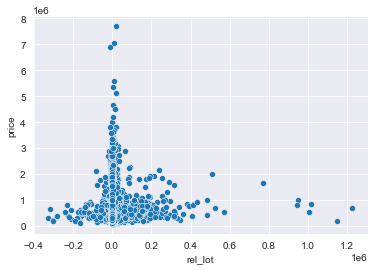

In [143]:
sns.scatterplot(x= 'rel_lot', y='price', data= df)

It would appear that the relative lot space does not any sort of linear relationship with price
- there are a seemingly equal ammount of houses that have negligible (close to 0) differences in lot sqftage that are valued from very low to very high ranges

<AxesSubplot:xlabel='rel_living', ylabel='price'>

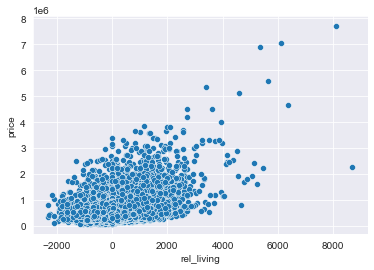

In [144]:
sns.scatterplot(x= 'rel_living', y='price', data= df)

It would appear that the relative living space has a negative linear relationship with price

### Checking Multicullinearity 

<AxesSubplot:>

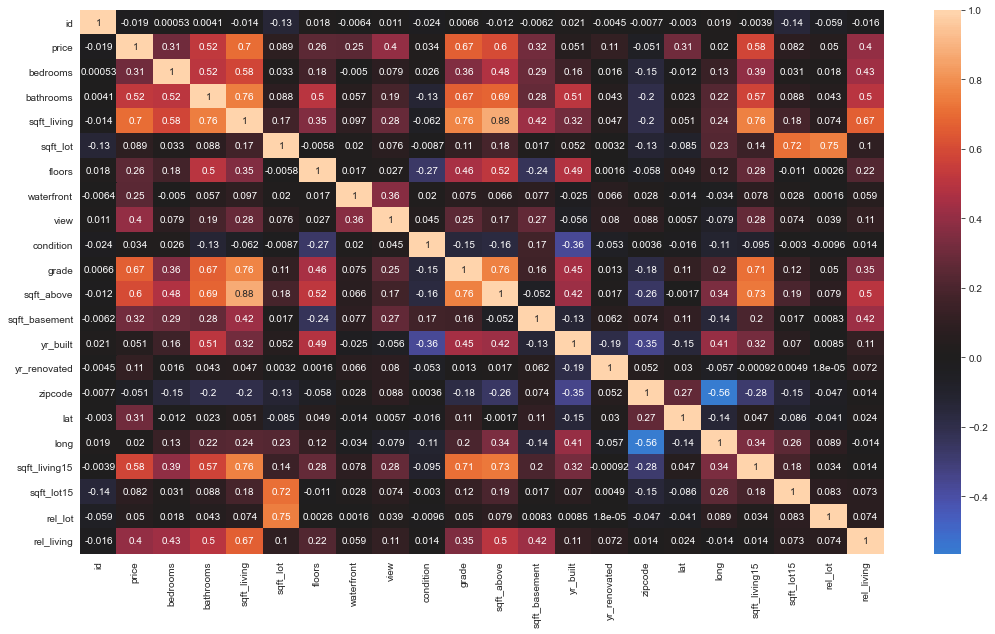

In [145]:
plt.figure(figsize=(18,10))
sns.heatmap(data = df.corr(), center=0, annot=True)

**Observations**
- sqft_above has a disruptive correlation (0.88)
    - I will be dropping sqft_above, considering sqft_living already takes the upstairs living space into account
- sqft_living has a correlation just above 0.75 with grade and sqft_living15
    - I will be dropping sqft_living15 as rel_living evaluates the same relationship 
    - I will not drop either sqft_living or grade as I believe they are both crucial for my model, and only surpass the threshold of 0.75 by 0.1
- Dropping rel_lot as it has a correlation of 0.75 with sqft_lot, and sqft_lot has a slightly higher correlation with price


In [146]:
df.drop('sqft_above', axis=1, inplace=True)
df.drop('sqft_living15', axis=1, inplace=True)
df.drop('rel_lot', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

# Explore 

In [147]:
sns.set_style('darkgrid')

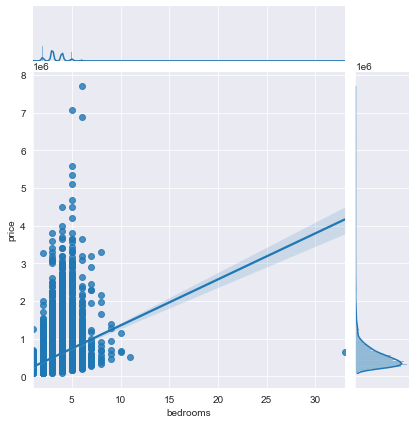

In [148]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')

I will need to investigate / remove the datapoint that has over 30 bedrooms

It would appear that the price of a property reaches its maximum at 5 bedrooms
- after that point it would appear the prices of properties begins to fall 

In [149]:
df[(df['bedrooms'] > 30)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,rel_living
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,580.0,1947,0.0,98103,47.6878,-122.331,4700,290


33 bedrooms with onlh 1620 sqft living space
- I am going to delete this datapoint

In [150]:
indexname = df[(df['bedrooms'] > 30)].index
df.drop(indexname, inplace=True)

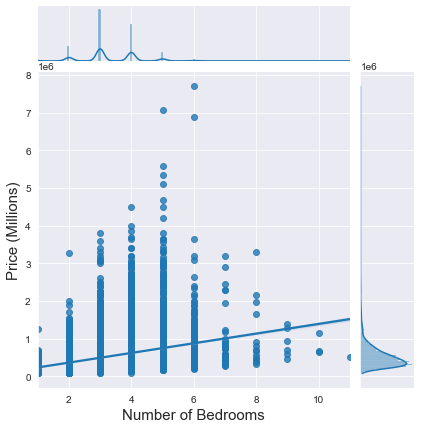

In [151]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')
plt.ylabel('Price (Millions)', fontsize=15)
plt.xlabel('Number of Bedrooms', fontsize=15)
plt.savefig('images/bedrooms.png');


11 bedrooms still seems unusual... but I will keep for now

In [152]:
df.groupby('bedrooms').median()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,rel_living
bedrooms,,,,,,,,,,,,,,,,,,
1,3.333002e+09,305000.0,1.00,780.0,5700.0,1.0,0.0,0.0,3.0,6.0,0.0,1939.0,0.0,98116.0,47.56590,-122.316,5500.0,-530.0
2,3.904100e+09,375000.0,1.00,1140.0,5240.0,1.0,0.0,0.0,3.0,7.0,0.0,1948.0,0.0,98115.5,47.60320,-122.316,5400.0,-222.0
3,3.861450e+09,415000.0,2.00,1680.0,7620.0,1.0,0.0,0.0,3.0,7.0,0.0,1976.0,0.0,98059.0,47.56585,-122.231,7686.0,-10.0
4,4.036600e+09,550000.0,2.50,2410.0,8100.0,2.0,0.0,0.0,3.0,8.0,0.0,1980.0,0.0,98056.0,47.57135,-122.192,8000.0,140.0
5,4.027701e+09,620000.0,2.75,2870.0,8944.0,2.0,0.0,0.0,3.0,8.0,690.0,1975.0,0.0,98056.0,47.58320,-122.208,8550.0,450.0
6,3.876100e+09,662500.0,3.00,2980.0,8732.0,2.0,0.0,0.0,3.0,8.0,880.0,1966.0,0.0,98077.0,47.60240,-122.269,8240.0,820.0
7,3.618730e+09,728580.0,3.50,3335.0,8836.0,2.0,0.0,0.0,3.0,8.0,500.0,1964.5,0.0,98104.0,47.62120,-122.282,8088.0,1225.0
8,3.756900e+09,700000.0,3.25,3840.0,7500.0,2.0,0.0,0.0,3.0,8.0,1300.0,1962.0,0.0,98105.0,47.63160,-122.303,7624.0,1290.0
9,5.863050e+09,817000.0,4.25,3755.0,5254.0,2.0,0.0,0.0,3.0,7.0,895.0,1916.5,0.0,98105.0,47.66290,-122.308,4360.0,1815.0


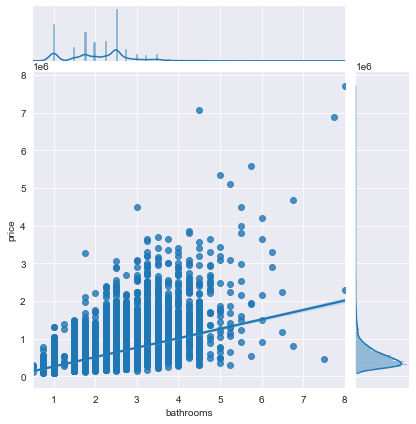

In [153]:
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')

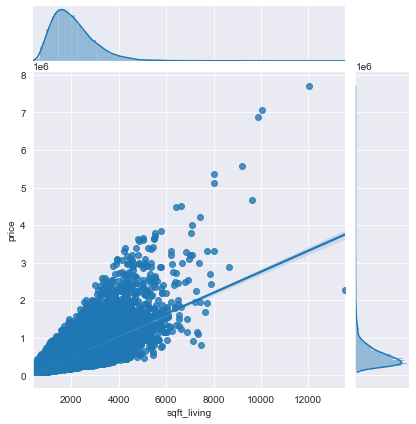

In [154]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')

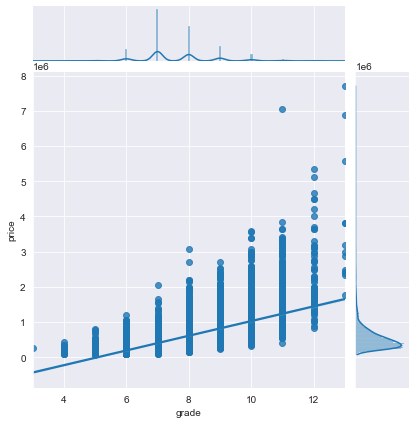

In [155]:
sns.jointplot(x='grade', y='price', data=df, kind='reg')

In [156]:
df['grade'].value_counts()

7     8862
8     6029
9     2595
6     1988
10    1126
11     394
5      234
12      87
4       27
13      13
3        1
Name: grade, dtype: int64

There are very few datapoints for grades 3 and 13, it will probably be beneficial to remove these after the baseline 

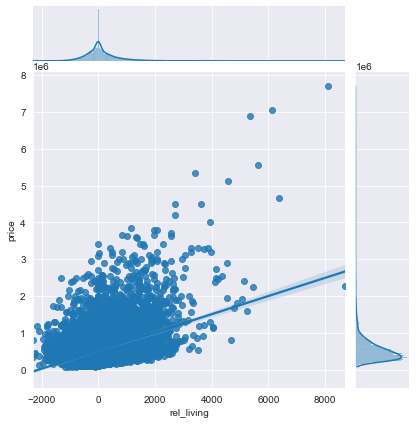

In [157]:
sns.jointplot(x='rel_living', y='price', data=df, kind='reg')

It would appear that as rel_living increases (as the difference between the living space of a property and the average of the the nearest 15 neighbors' living spaces increases) price also increases


### Baseline Model

In [158]:
outcome = 'price'
predictors = df.drop('price', axis=1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables
model_baseline = ols(formula=formula, data=df).fit()
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2744.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:16:07   Log-Likelihood:            -2.9110e+05
No. Observations:               21356   AIC:                         5.822e+05
Df Residuals:                   21337   BIC:                         5.824e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.999e+06   2.95e+06      2.713      0.007    2.22e+06    1.38e+07
id            -1.411e-06   4.85e-07     -2.906      0.004   -2.36e-06   -4.59e-07
bedrooms      -3.944e+04   1995.297    -19.769      0.000   -4.34e+04   -3.55e+04
bathrooms      4.245e+04   3278.272     12.950      0.000     3.6e+04    4.89e+04
sqft_living     201.8418      3.934     51.308      0.000     194.131     209.553
sqft_lot          0.1172      0.048      2.439      0.015       0.023       0.211
floors         8834.8918   3579.594      2.468      0.014    1818.619    1.59e+04
waterfront     5.303e+05   1.73e+04     30.726      0.000    4.96e+05    5.64e+05
view           5.707e+04   2116.549     26.966      0.000    5.29e+04    6.12e+04
condition       2.54e+04   2359.892     10.765      0.000    2.08e+04       3e+04
grade          9.693e+04   2173.140     44.603      0.000    9.27e+04    1.01e+05
sqft_basement   -27.9083      4.289     -6.507      0.000     -36.314     -19.502
yr_built      -2670.0692     71.863    -37.155      0.000   -2810.925   -2529.213
yr_renovated     19.9715      3.598      5.551      0.000      12.919      27.024
zipcode        -593.4347     33.204    -17.872      0.000    -658.517    -528.352
lat            5.996e+05   1.08e+04     55.597      0.000    5.78e+05    6.21e+05
long           -2.15e+05   1.32e+04    -16.251      0.000   -2.41e+05   -1.89e+05
sqft_lot15       -0.4048      0.074     -5.498      0.000      -0.549      -0.260
rel_living      -21.0343      3.458     -6.083      0.000     -27.812     -14.256
==============================================================================
Omnibus:                    18041.038   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1789689.106
Skew:                           3.533   Prob(JB):                         0.00
Kurtosis:                      47.287   Cond. No.                     1.16e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation**
- Rsquared is already almost 0.7
- Baseline model seems to be moderately good at explaining variations in price 
- All variables seem to be be well below a = 0.05
- Negative coefficients:
    - bedrooms
        - For 1 addition bedroom price drops approx 36,500
        - this is counterintuitive... hopefully it will change as optimization occurs
    - sqft_basement
        - For 1 addition sqft of basement price drops approx 26
        - this is also counterintuitive 
    - yr_built
        - I can understand this being negative, if older houses being sold are larger / historical
    - sqft_lot15
        - very small negative coefficient
    - rel_living 
        - For every additional 1 sqft living space that a property has above the average livning space of its 15 neighbors, price decreses by 20
        - For every addional 1 sqft living space that a property has below the average living space of its 15 neighbors, price increases by 20
        - This is conflicting with sqft_living, which states that for every 1 additional sqft of living space, price increases by 202 


**Features to Drop**
- id (does not provide relevant information pertaining to price)

#### Baseline  Test

In [159]:
X = df.drop("price", axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)




In [160]:
baseline_linreg = LinearRegression()

baseline_linreg.fit(X_train, y_train)

y_pred = baseline_linreg.predict(X_test)

residuals = y_pred - y_test

In [161]:
baseline_linreg.coef_

array([-1.70179949e-06, -3.77744120e+04,  3.91797963e+04,  1.99401540e+02,
        1.94632119e-01,  1.03458851e+04,  5.56592538e+05,  5.52560000e+04,
        2.37297935e+04,  9.85437461e+04, -2.75186233e+01, -2.64879155e+03,
        1.92704317e+01, -5.85343550e+02,  6.07154453e+05, -2.06978105e+05,
       -4.12115841e-01, -2.43207113e+01])

Train RMSE: 197920.8648616014
Test RMSE: 210837.5696547084
Test Difference: 12916.704793106997


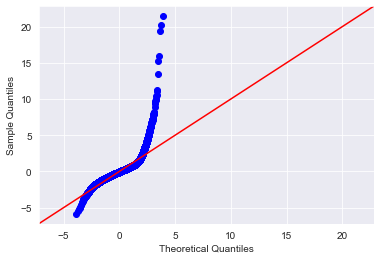

In [162]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

residuals = model_baseline.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))
print('Test Difference:', np.sqrt(mse_test) - np.sqrt(mse_train))
fig.show()

**Interpretation**
- Based on the QQ Plot the residuals do not follow a normal distribution
- I will be applying the assumptions based on the business problem to deal with extreme values / outliers 

# Adding Corresponding Cities to Zipcodes

Right now it will be much too difficult to have any meaningful geographical insights using zipcodes, lat, or long 
- 70 zipcodes is too much to include in the model
- long and lat is too vague

Using the 'All Zipcodes and PO Box as Centroids for King County / zipcode all point'.csv file (source below), I will be able to create a new column that will assign a corresponding city based on the zip code, greatly reducing the geogrpahical features in my model

source: https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::all-zipcodes-and-po-box-as-centroids-for-king-county-zipcode-all-point/about

### Initial Cleaning

In [163]:
kc_zip = pd.read_csv('data/kc_zip.csv')

In [164]:
kc_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               261 non-null    float64
 1   Y               261 non-null    float64
 2   OBJECTID        261 non-null    int64  
 3   ZIP             261 non-null    int64  
 4   ZIPCODE         261 non-null    int64  
 5   COUNTY          260 non-null    float64
 6   ZIP_TYPE        261 non-null    object 
 7   PREFERRED_CITY  261 non-null    object 
 8   FEATURE_SOURCE  261 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 18.5+ KB


In [165]:
kc_zip.drop(['X', 'Y', 'OBJECTID', 'ZIP', 'COUNTY', 'ZIP_TYPE', 'FEATURE_SOURCE'], axis=1, inplace=True )

kc_zip['zipcode'] = kc_zip['ZIPCODE']
kc_zip.drop('ZIPCODE', axis=1, inplace=True)

kc_zip['city'] = kc_zip['PREFERRED_CITY']
kc_zip.drop('PREFERRED_CITY', axis=1, inplace=True)

# kc_zip

In [166]:
kc_zip[(kc_zip['city'] == 'SAMMAMIISH')]

,zipcode,city
109,98075,SAMMAMIISH


In [167]:
kc_zip.replace(to_replace='SAMMAMIISH', value='SAMMAMISH', inplace=True)

In [168]:
zip_list = df['zipcode'].unique().tolist()
# len(zip_list)

In [169]:
for index, contents in kc_zip.iterrows():
    if contents['zipcode'] not in zip_list:
        kc_zip.drop(labels=[index], inplace=True)
        
# kc_zip

In [170]:
kc_zip.duplicated().sum()

4

In [171]:
kc_zip.drop_duplicates(keep='first', inplace=True)

In [172]:
merged = pd.merge(df, kc_zip, how='left')

# merged

In [173]:
merged['city'].value_counts(normalize=True)

SEATTLE          0.414731
RENTON           0.073797
BELLEVUE         0.065228
KENT             0.055722
KIRKLAND         0.045608
REDMOND          0.045374
AUBURN           0.042236
SAMMAMISH        0.037086
FEDERAL WAY      0.035774
ISSAQUAH         0.034089
MAPLE VALLEY     0.027299
WOODINVILLE      0.021821
SNOQUALMIE       0.014235
KENMORE          0.013158
MERCER ISLAND    0.013064
ENUMCLAW         0.010863
NORTH BEND       0.010208
BOTHELL          0.009037
DUVALL           0.008897
CARNATION        0.005760
VASHON           0.005432
BLACK DIAMOND    0.004636
FALL CITY        0.003652
MEDINA           0.002294
Name: city, dtype: float64

40% of properties in data set are within Seattle 

In [174]:
merged.shape[0] - df.shape[0]

0

In [175]:
merged.duplicated().sum()

0

In [176]:
merged.shape

(21356, 20)

In [177]:
merged.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_lot15       0
rel_living       0
city             0
dtype: int64

In [178]:
merged['city'] = merged['city'].str.replace(' ', '_')

# merged

### Exploring Cities 

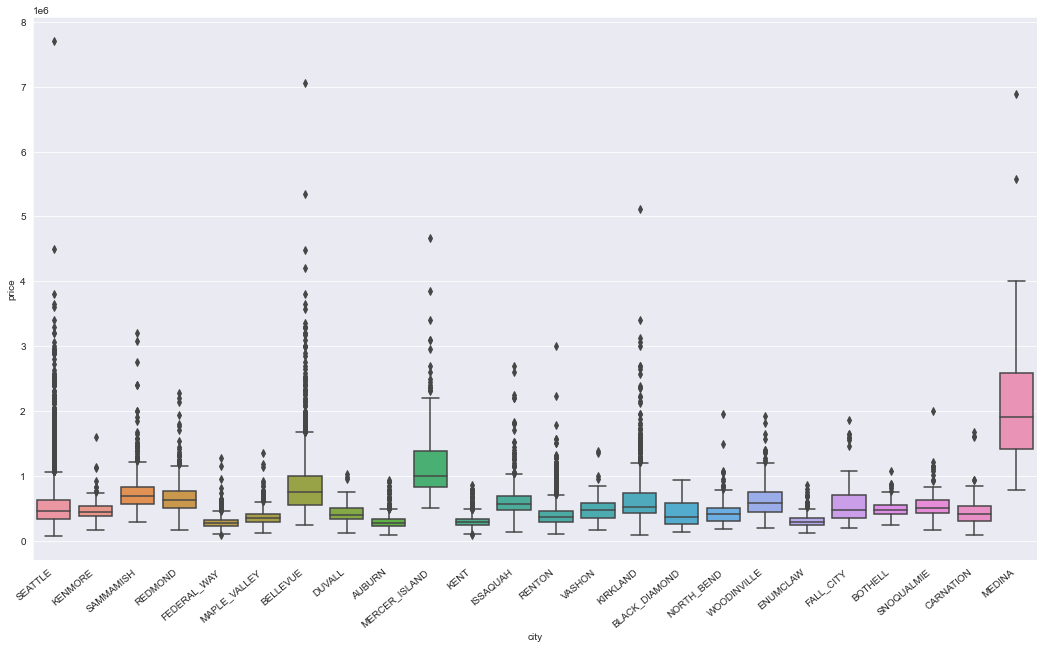

In [179]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(ax=ax, x='city', y = 'price', data= merged)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

- A lot of outliers
- I think it will be beneficial exploring the behavior of my model by removing more outliers 
- I think I will create another model with all categories including cities to see how they change relationships of other features 

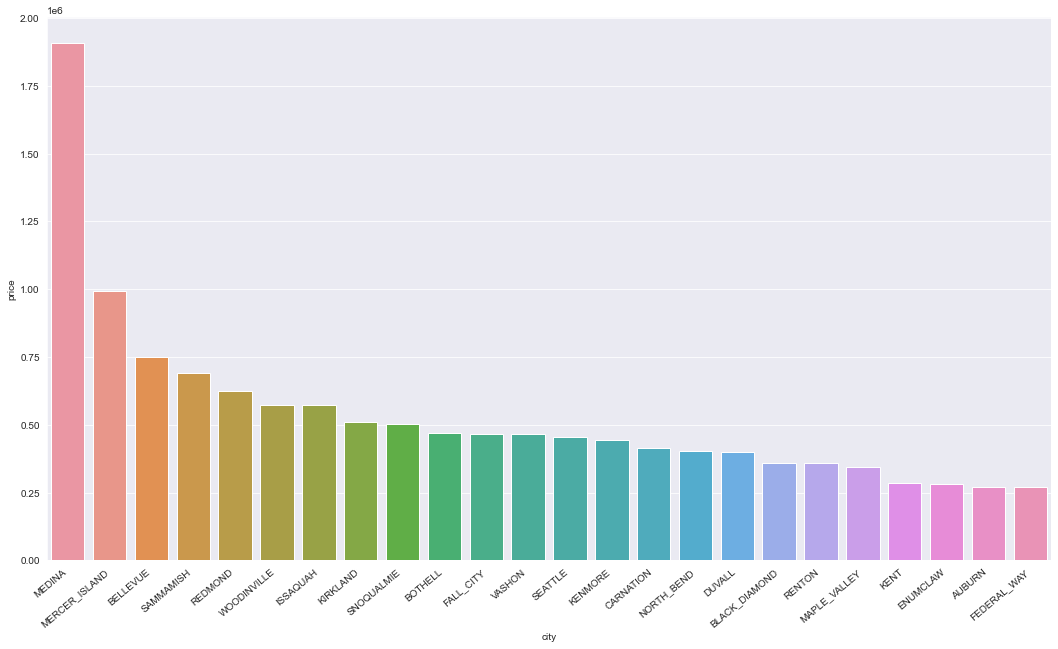

In [180]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(ax=ax, x='city', y = 'price', data= merged.groupby('city').median().reset_index().sort_values(by='price', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

The top 3 most expensive cities to live in are Medina, Mercer Island, and Bellevue
- all of which are neighboring eachother 
- all of which are touching Lake Washington 

In [181]:
merged.groupby('city')['waterfront'].sum()

city
AUBURN            2.0
BELLEVUE         15.0
BLACK_DIAMOND     0.0
BOTHELL           0.0
CARNATION         0.0
DUVALL            0.0
ENUMCLAW          1.0
FALL_CITY         0.0
FEDERAL_WAY       3.0
ISSAQUAH          2.0
KENMORE           2.0
KENT              1.0
KIRKLAND          8.0
MAPLE_VALLEY      0.0
MEDINA            1.0
MERCER_ISLAND    10.0
NORTH_BEND        0.0
REDMOND           3.0
RENTON            5.0
SAMMAMISH        15.0
SEATTLE          69.0
SNOQUALMIE        1.0
VASHON           20.0
WOODINVILLE       1.0
Name: waterfront, dtype: float64

- Despite bordering Lake Washington, Medina (the most expensive city) only has one property listed as waterfront 
- Seattle has the most waterfront properties, but also contains nearly half of all the properties within the dataset

In [182]:
merged['city'].value_counts()

SEATTLE          8857
RENTON           1576
BELLEVUE         1393
KENT             1190
KIRKLAND          974
REDMOND           969
AUBURN            902
SAMMAMISH         792
FEDERAL_WAY       764
ISSAQUAH          728
MAPLE_VALLEY      583
WOODINVILLE       466
SNOQUALMIE        304
KENMORE           281
MERCER_ISLAND     279
ENUMCLAW          232
NORTH_BEND        218
BOTHELL           193
DUVALL            190
CARNATION         123
VASHON            116
BLACK_DIAMOND      99
FALL_CITY          78
MEDINA             49
Name: city, dtype: int64

All cities have ample enough datapoints that will be sufficient for modeling

In [183]:
merged['city'].value_counts(normalize=True)

SEATTLE          0.414731
RENTON           0.073797
BELLEVUE         0.065228
KENT             0.055722
KIRKLAND         0.045608
REDMOND          0.045374
AUBURN           0.042236
SAMMAMISH        0.037086
FEDERAL_WAY      0.035774
ISSAQUAH         0.034089
MAPLE_VALLEY     0.027299
WOODINVILLE      0.021821
SNOQUALMIE       0.014235
KENMORE          0.013158
MERCER_ISLAND    0.013064
ENUMCLAW         0.010863
NORTH_BEND       0.010208
BOTHELL          0.009037
DUVALL           0.008897
CARNATION        0.005760
VASHON           0.005432
BLACK_DIAMOND    0.004636
FALL_CITY        0.003652
MEDINA           0.002294
Name: city, dtype: float64

40% of properties in data set are within Seattle 

# Creating Summary / Split Test Functions

Creating summary and tt_split functions to save myself tedious / repetitive coding

In [184]:
def summary(df, preds): 
    outcome = 'price'
    predictors = preds
    predictor_variables = "+".join(predictors.columns)
    formula = outcome + '~' + predictor_variables
    global model 
    model = ols(formula=formula, data=df).fit()
    return model.summary()

In [185]:
def tt_split(df, preds):
    X = preds
    y = df['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
    
    baseline_linreg = LinearRegression()
    baseline_linreg.fit(X_train, y_train)
    y_pred = baseline_linreg.predict(X_test)
    residuals = y_pred - y_test
    
    mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
    mse_test = mean_squared_error(y_test, y_pred)
    
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    
    return print('Train MSE:', np.sqrt(mse_train), '\n'
                'Test MSE:', np.sqrt(mse_test), '\n'
                'Test Difference:', np.sqrt(mse_test) - np.sqrt(mse_train)), fig.show();

# Baseline with Cities (Model 2) 

### Cleaning 

#### Defining/ Calculating "Affordable"

It is safe to assume that recent college graduates will not be looking to purchase a home, but the only available data regarding price is the entire price of the property

To account for this the following measures have been taken: 
- Given 450,000 USD is the median price will be the maximum threshold for "affordable"
- Given that recent college graduates often live with multiple roommates, I will be assuming the potential for having 3 tennants for a property 
    - Given this assumption, I will not be looking at houses priced over 1,350,000 USD (3x the median price) 


In [186]:
cities_baseline = df[(df['price'] <= 1350000)]

In [187]:
cities_baseline.groupby('bedrooms').median()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,rel_living
bedrooms,,,,,,,,,,,,,,,,,,
1,3.333002e+09,305000.0,1.0,780.0,5700.0,1.00,0.0,0.0,3.0,6.0,0.0,1939.0,0.0,98116.0,47.56590,-122.3160,5500.0,-530.0
2,3.904100e+09,374000.0,1.0,1140.0,5225.0,1.00,0.0,0.0,3.0,7.0,0.0,1948.0,0.0,98116.0,47.60320,-122.3160,5382.0,-230.0
3,3.862710e+09,410000.0,2.0,1670.0,7604.0,1.00,0.0,0.0,3.0,7.0,0.0,1976.0,0.0,98059.0,47.56420,-122.2300,7674.0,-10.0
4,4.036801e+09,530677.5,2.5,2370.0,8000.0,2.00,0.0,0.0,3.0,8.0,0.0,1980.0,0.0,98058.0,47.56660,-122.1890,7907.5,120.0
5,4.038700e+09,579950.0,2.5,2760.0,8550.0,1.50,0.0,0.0,3.0,8.0,650.0,1974.0,0.0,98058.0,47.57420,-122.2000,8346.0,400.0
6,3.876051e+09,622250.0,3.0,2890.0,8577.0,1.50,0.0,0.0,3.0,8.0,820.0,1966.0,0.0,98075.0,47.58795,-122.2665,8238.0,790.0
7,3.238880e+09,598078.5,3.5,3150.0,8624.5,1.75,0.0,0.0,3.0,8.0,175.0,1963.5,0.0,98105.5,47.61630,-122.2900,7970.5,1005.0
8,7.226500e+09,575000.0,3.0,2850.0,6695.0,1.50,0.0,0.0,3.0,7.0,1140.0,1968.0,0.0,98105.0,47.66170,-122.3030,4800.0,1290.0
9,2.902200e+09,700000.0,4.5,3680.0,5000.0,2.00,0.0,0.0,3.0,7.0,940.0,1918.0,0.0,98105.0,47.66040,-122.3070,4400.0,1720.0


In [188]:
cities_baseline = cities_baseline[(cities_baseline['bedrooms'] < 8)]

There is an extreme outlier (33 bedrooms)
- Considering the target demographic is recent graduates, any house with more than 7 bedrooms will be extravogant 
    - 5 and more is still extravogant, however I do not want to remove too many datapoints

In [189]:
cities_baseline = cities_baseline[(cities_baseline['bathrooms'] > 0.5)]

Removing any datapoints with anything less than .75 bathrooms, as anything less would be uninhabitable 

In [190]:
cities_baseline = pd.merge(cities_baseline, kc_zip, how='left')
 # cities_baseline.info()

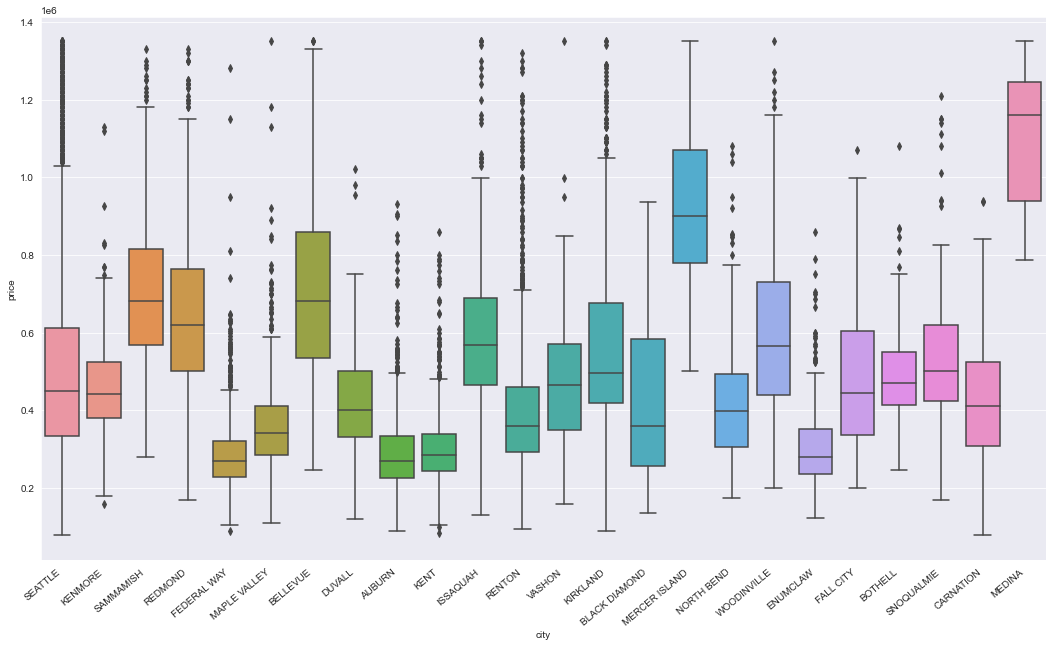

In [191]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(ax=ax, x='city', y = 'price', data= cities_baseline)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

There are still many outliers, however I believe this to be representative of property prices and I will not be removing them
- In a given city / neighborhood there are properties with much higher prices due to a variety of different factors (historical significance, rennovations, waterfront status, architecture, etc.) 
- A model that could not take these outliers into account will be of no use 

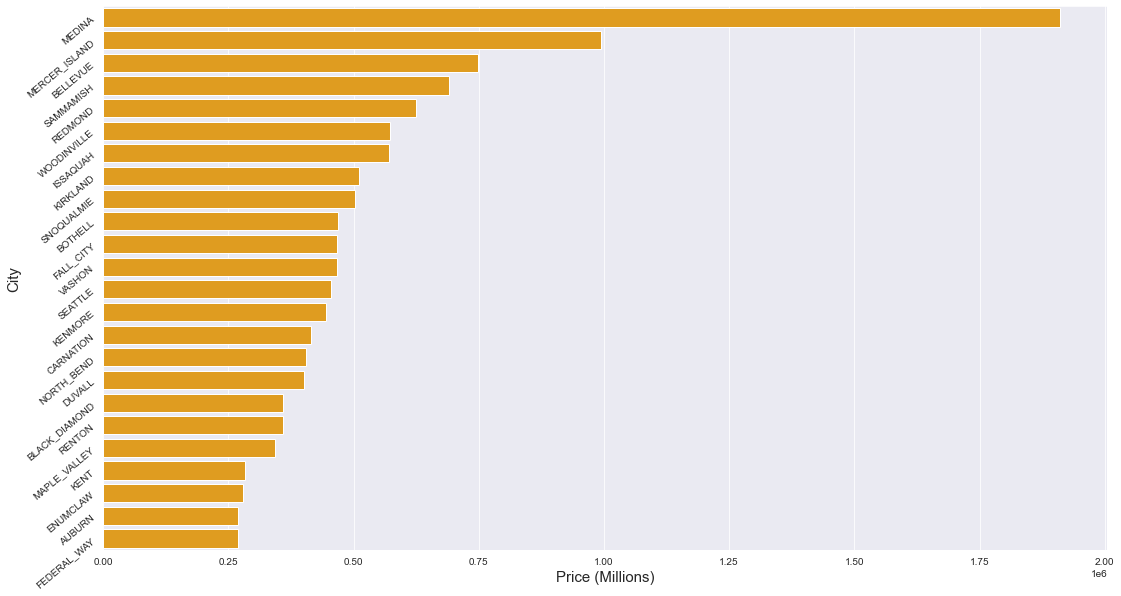

In [192]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(ax=ax, x='price', y = 'city', 
            data= merged.groupby('city').median().reset_index().sort_values(by='price', ascending=False),
           color = 'orange')
sns.set_style('darkgrid')
ax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha='right')
plt.xlabel('Price (Millions)', fontsize=15)
plt.ylabel('City', fontsize=15)
plt.savefig('images/cities.png');

No change in most expensive cities 

In [193]:
cities_baseline['city'] = cities_baseline['city'].str.replace(' ', '_')
city_dummies = pd.get_dummies(cities_baseline['city'], drop_first=True)

In [194]:
cities_baseline = pd.concat([cities_baseline, city_dummies], axis=1)
cities_baseline.drop('city', axis=1, inplace=True)

In [195]:
cities_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20648 entries, 0 to 20647
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20648 non-null  int64  
 1   price          20648 non-null  float64
 2   bedrooms       20648 non-null  int64  
 3   bathrooms      20648 non-null  float64
 4   sqft_living    20648 non-null  int64  
 5   sqft_lot       20648 non-null  int64  
 6   floors         20648 non-null  float64
 7   waterfront     20648 non-null  float64
 8   view           20648 non-null  float64
 9   condition      20648 non-null  int64  
 10  grade          20648 non-null  int64  
 11  sqft_basement  20648 non-null  float64
 12  yr_built       20648 non-null  int64  
 13  yr_renovated   20648 non-null  float64
 14  zipcode        20648 non-null  int64  
 15  lat            20648 non-null  float64
 16  long           20648 non-null  float64
 17  sqft_lot15     20648 non-null  int64  
 18  rel_li

In [196]:
cities_baseline.drop(['id', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

With 'city' being the most informative geographical feature, I am dropping 'zipcode', 'lat', and 'long'
- I am also dropping 'id' as it adds no relevant information to my model

In [197]:
summary(cities_baseline, cities_baseline.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     1552.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:16:10   Log-Likelihood:            -2.7080e+05
No. Observations:               20648   AIC:                         5.417e+05
Df Residuals:                   20610   BIC:                         5.420e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       2.92e+06   8.98e+04     32.502      0.000    2.74e+06     3.1e+06
bedrooms      -1.339e+04   1263.820    -10.592      0.000   -1.59e+04   -1.09e+04
bathrooms      2.776e+04   2044.199     13.578      0.000    2.37e+04    3.18e+04
sqft_living     128.6506      2.557     50.316      0.000     123.639     133.662
sqft_lot          0.2312      0.030      7.730      0.000       0.173       0.290
floors         3.773e+04   2272.067     16.606      0.000    3.33e+04    4.22e+04
waterfront      1.21e+05   1.41e+04      8.555      0.000    9.33e+04    1.49e+05
view           2.949e+04   1373.597     21.472      0.000    2.68e+04    3.22e+04
condition      2.531e+04   1456.039     17.385      0.000    2.25e+04    2.82e+04
grade          7.537e+04   1367.743     55.104      0.000    7.27e+04     7.8e+04
sqft_basement    -5.5737      2.758     -2.021      0.043     -10.981      -0.167
yr_built      -1812.3153     45.906    -39.479      0.000   -1902.295   -1722.336
yr_renovated     12.6573      2.253      5.617      0.000       8.241      17.074
sqft_lot15       -0.1262      0.047     -2.706      0.007      -0.218      -0.035
rel_living      -44.5904      2.292    -19.454      0.000     -49.083     -40.098
BELLEVUE       2.919e+05   5456.382     53.501      0.000    2.81e+05    3.03e+05
BLACK_DIAMOND   9.51e+04   1.28e+04      7.440      0.000       7e+04     1.2e+05
BOTHELL        1.315e+05   9573.724     13.736      0.000    1.13e+05     1.5e+05
CARNATION      1.238e+05   1.19e+04     10.439      0.000    1.01e+05    1.47e+05
DUVALL         1.057e+05   9649.822     10.956      0.000    8.68e+04    1.25e+05
ENUMCLAW       7851.9171   8995.990      0.873      0.383   -9780.936    2.55e+04
FALL_CITY      1.575e+05    1.5e+04     10.530      0.000    1.28e+05    1.87e+05
FEDERAL_WAY   -1.941e+04   5943.433     -3.265      0.001   -3.11e+04   -7756.667
ISSAQUAH       1.831e+05   6094.424     30.043      0.000    1.71e+05    1.95e+05
KENMORE        1.239e+05   8254.271     15.012      0.000    1.08e+05     1.4e+05
KENT           1.126e+04   5318.820      2.118      0.034     837.864    2.17e+04
KIRKLAND       2.429e+05   5674.821     42.794      0.000    2.32e+05    2.54e+05
MAPLE_VALLEY   4.603e+04   6431.604      7.156      0.000    3.34e+04    5.86e+04
MEDINA         6.636e+05   3.65e+04     18.163      0.000    5.92e+05    7.35e+05
MERCER_ISLAND   4.07e+05   9484.952     42.908      0.000    3.88e+05    4.26e+05
NORTH_BEND      1.15e+05   9145.206     12.579      0.000    9.71e+04    1.33e+05
REDMOND        2.392e+05   5661.233     42.253      0.000    2.28e+05     2.5e+05
RENTON         7.373e+04   5043.990     14.617      0.000    6.38e+04    8.36e+04
SAMMAMISH      1.967e+05   6099.362     32.247      0.000    1.85e+05    2.09e+05
SEATTLE        1.944e+05   4454.472     43.642   

**Interpretation**
- Adding cities (and removing other geographical features) has improved the r-squared value significantly (up nearly 0.4 from baseline)
- Enumclaw appears to be the only city with a large p-value
- bedrooms still has a substantial negative coefficient
    - may need to propose this be looked into further 
- sqft_basement is still negative, but is much smaller
    - for every sqft of basement price only drops 4
- rel_living has a larger negative coefficient and is still conflicting with sqft_living



**Next Model** 
- I will be dropping 'condition' as it conveys the same information as 'grade'
    - 'grade' is a measure used by the local government, wheras 'condition' might be much more subjective 
- I am dropping rel_living due to its conflict with sqft_living
- Keeping Enumclaw for now despite p-value (0.405)
    - Considering the massive increase in r-squared by adding the cities, I want to see if tweaking other features will prove that all cities are significantly influential 
- Creating dummy variabels for grade

Train MSE: 120051.21351212364 
Test MSE: 120490.74879712662 
Test Difference: 439.53528500298853


(None, None)

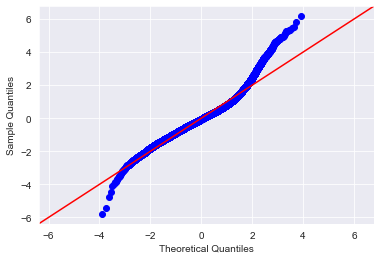

In [198]:
tt_split(cities_baseline, cities_baseline.drop('price', axis=1))

**Interpretation**
- After filtering the data based on assumptions based on max price, number of bedrooms, and bathrooms, the residuals seem to be much more normally distributed than the baseline test

# Model 3

There is a strong positive relationship between 'grade' and 'price' 
 - Given there are 11 grades I will first create dummy variables, and then bin the grades based on their coeficients 

### Cleaning

In [199]:
cities_baseline['grade'].value_counts()

7     8844
8     5981
9     2451
6     1986
10     897
5      233
11     218
4       27
12      10
3        1
Name: grade, dtype: int64

There is a single datapoint where grade = 3

In [200]:
indexnames = cities_baseline[cities_baseline['grade'] == 3].index
cities_baseline.drop(indexnames, inplace=True)

# Model 3 (cont'd)

In [201]:
grade_dummies = pd.get_dummies(cities_baseline['grade'], prefix='grade', drop_first=True)
model3 = pd.concat([cities_baseline, grade_dummies], axis=1)
model3.drop(['grade', 'condition', 'rel_living'], axis=1, inplace=True)

In [202]:
summary(model3, model3.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     1326.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:16:11   Log-Likelihood:            -2.7102e+05
No. Observations:               20647   AIC:                         5.421e+05
Df Residuals:                   20604   BIC:                         5.425e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.942e+06    8.9e+04     44.287      0.000    3.77e+06    4.12e+06
bedrooms      -1.207e+04   1298.042     -9.297      0.000   -1.46e+04   -9524.066
bathrooms      3.054e+04   2073.122     14.731      0.000    2.65e+04    3.46e+04
sqft_living      97.1955      2.312     42.041      0.000      92.664     101.727
sqft_lot          0.1958      0.030      6.478      0.000       0.137       0.255
floors         3.216e+04   2313.715     13.898      0.000    2.76e+04    3.67e+04
waterfront     1.201e+05   1.43e+04      8.395      0.000    9.21e+04    1.48e+05
view           3.326e+04   1371.978     24.243      0.000    3.06e+04     3.6e+04
sqft_basement    -5.2995      2.800     -1.893      0.058     -10.788       0.189
yr_built      -2050.7407     44.471    -46.115      0.000   -2137.907   -1963.575
yr_renovated      5.6933      2.256      2.524      0.012       1.272      10.115
sqft_lot15       -0.0624      0.047     -1.327      0.185      -0.155       0.030
BELLEVUE       3.046e+05   5492.020     55.459      0.000    2.94e+05    3.15e+05
BLACK_DIAMOND  9.637e+04   1.29e+04      7.453      0.000     7.1e+04    1.22e+05
BOTHELL        1.367e+05   9664.878     14.144      0.000    1.18e+05    1.56e+05
CARNATION      1.088e+05    1.2e+04      9.063      0.000    8.53e+04    1.32e+05
DUVALL         1.081e+05   9749.824     11.084      0.000     8.9e+04    1.27e+05
ENUMCLAW       1.094e+04   9106.062      1.202      0.229   -6905.355    2.88e+04
FALL_CITY      1.492e+05   1.51e+04      9.862      0.000     1.2e+05    1.79e+05
FEDERAL_WAY   -1.823e+04   6013.515     -3.031      0.002      -3e+04   -6442.831
ISSAQUAH       1.885e+05   6158.951     30.603      0.000    1.76e+05    2.01e+05
KENMORE        1.271e+05   8340.791     15.233      0.000    1.11e+05    1.43e+05
KENT           1.634e+04   5378.364      3.038      0.002    5799.662    2.69e+04
KIRKLAND       2.447e+05   5739.717     42.636      0.000    2.33e+05    2.56e+05
MAPLE_VALLEY   5.268e+04   6494.797      8.111      0.000    3.99e+04    6.54e+04
MEDINA         6.925e+05   3.69e+04     18.758      0.000     6.2e+05    7.65e+05
MERCER_ISLAND    4.3e+05   9541.042     45.072      0.000    4.11e+05    4.49e+05
NORTH_BEND      1.07e+05   9242.477     11.582      0.000    8.89e+04    1.25e+05
REDMOND        2.454e+05   5707.108     42.996      0.000    2.34e+05    2.57e+05
RENTON         7.813e+04   5099.010     15.323      0.000    6.81e+04    8.81e+04
SAMMAMISH      2.049e+05   6143.819     33.356      0.000    1.93e+05    2.17e+05
SEATTLE        1.846e+05   4485.398     41.160      0.000    1.76e+05    1.93e+05
SNOQUALMIE     1.308e+05   8149.966     16.044      0.000    1.15e+05    1.47e+05
VASHON         1.134e+05   1.25e+04      9.072      0.000    8.89e+04    1.38e+05
WOODINVILLE    1.693e+05   7060.339     23.973   

**Interpretation**
- sqft_basement now has a positive coefficient, but a very large p-value
    - I believe it will be beneficial to drop this feature as its coefficient and p-value has been fluxuating with each model 
- I will be dropping sqft_lot due it is p-value
- Enumclaw now has a much smaller p-value, but is still well above 0.05
- I will be dropping grades 5-6 (p-value), and binning grades 7-8, 9-10, 11-12


**Backtracking**
- after dropping grades 5and6 and binning the rest, rsquared drops by .3 to nearly its value from the baseline model
- while not ideal, I will be dropping grades 5 and 6 and keeping the rest as dummy variables to prioritize model fit 

In [203]:
model3.drop(['grade_5', 'grade_6', 'sqft_basement', 'sqft_lot'], axis=1, inplace=True)
summary(model3, model3.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     1461.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:16:11   Log-Likelihood:            -2.7104e+05
No. Observations:               20647   AIC:                         5.422e+05
Df Residuals:                   20608   BIC:                         5.425e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.973e+06   8.63e+04     46.023      0.000     3.8e+06    4.14e+06
bedrooms      -1.202e+04   1297.829     -9.264      0.000   -1.46e+04   -9479.661
bathrooms       2.99e+04   2050.449     14.584      0.000    2.59e+04    3.39e+04
sqft_living      96.1043      2.108     45.586      0.000      91.972     100.237
floors         3.382e+04   2073.139     16.311      0.000    2.98e+04    3.79e+04
waterfront     1.194e+05   1.43e+04      8.337      0.000    9.13e+04    1.47e+05
view           3.308e+04   1366.338     24.208      0.000    3.04e+04    3.58e+04
yr_built      -2050.8651     44.370    -46.222      0.000   -2137.833   -1963.897
yr_renovated      5.7629      2.258      2.552      0.011       1.337      10.189
sqft_lot15        0.1370      0.036      3.813      0.000       0.067       0.207
BELLEVUE       3.036e+05   5483.921     55.355      0.000    2.93e+05    3.14e+05
BLACK_DIAMOND  9.666e+04   1.29e+04      7.469      0.000    7.13e+04    1.22e+05
BOTHELL        1.364e+05   9673.996     14.101      0.000    1.17e+05    1.55e+05
CARNATION      1.106e+05    1.2e+04      9.218      0.000    8.71e+04    1.34e+05
DUVALL         1.084e+05   9761.132     11.101      0.000    8.92e+04    1.27e+05
ENUMCLAW       1.558e+04   9094.183      1.714      0.087   -2241.817    3.34e+04
FALL_CITY       1.51e+05   1.51e+04      9.978      0.000    1.21e+05    1.81e+05
FEDERAL_WAY   -1.862e+04   6015.310     -3.096      0.002   -3.04e+04   -6829.944
ISSAQUAH       1.877e+05   6156.941     30.489      0.000    1.76e+05       2e+05
KENMORE        1.266e+05   8346.182     15.170      0.000     1.1e+05    1.43e+05
KENT           1.661e+04   5383.531      3.085      0.002    6055.112    2.72e+04
KIRKLAND       2.442e+05   5739.882     42.550      0.000    2.33e+05    2.55e+05
MAPLE_VALLEY   5.373e+04   6500.073      8.267      0.000     4.1e+04    6.65e+04
MEDINA         6.913e+05    3.7e+04     18.704      0.000    6.19e+05    7.64e+05
MERCER_ISLAND  4.288e+05   9543.936     44.926      0.000     4.1e+05    4.47e+05
NORTH_BEND     1.102e+05   9241.032     11.928      0.000    9.21e+04    1.28e+05
REDMOND        2.456e+05   5711.707     43.002      0.000    2.34e+05    2.57e+05
RENTON         7.782e+04   5103.619     15.248      0.000    6.78e+04    8.78e+04
SAMMAMISH      2.048e+05   6148.439     33.310      0.000    1.93e+05    2.17e+05
SEATTLE        1.834e+05   4429.070     41.400      0.000    1.75e+05    1.92e+05
SNOQUALMIE     1.313e+05   8153.057     16.103      0.000    1.15e+05    1.47e+05
VASHON         1.157e+05   1.25e+04      9.254      0.000    9.12e+04     1.4e+05
WOODINVILLE    1.701e+05   7067.004     24.066      0.000    1.56e+05    1.84e+05
grade_7        8.308e+04   3125.039     26.587      0.000     7.7e+04    8.92e+04
grade_8        1.605e+05   3786.585     42.378   

**Interpretation**
- Very slight drop in Rsquared
- Enumclaw still has a p-value above 0.05, but has gotten smaller
    - accounting for view with dummy variables may lower this 

The commented section below is the attempt at binning the grade dummies

In [204]:
# model3['grade'] = cities_baseline['grade']

# #binning
# bins = [6,8,10,13]
# model3['bin_grade'] = pd.cut(model3['grade'], bins)

# # Cleaning what will become the column titles for each grade so as to not cause any
# # problems when put into the model formula
# model3['bin_grade'] = model3['bin_grade'].astype(str)
# model3['bin_grade'] = model3['bin_grade'].str.replace(' ', '')
# model3['bin_grade'] = model3['bin_grade'].str.replace('(', '')
# model3['bin_grade'] = model3['bin_grade'].str.replace(']', '')
# model3['bin_grade'] = model3['bin_grade'].str.replace(',', 'thru')
# model3['bin_grade'] = model3['bin_grade'].str.replace('.0', '')

# bin_dummies = pd.get_dummies(model3['bin_grade'], drop_first=True)
# bin_dummies.drop('nan', axis=1, inplace=True)

# # more cleaning column names to be more comprehendable / straightforward in summary 
# bin_dummies['grade_9thru10'] = bin_dummies['8thru']
# bin_dummies['grade_11thru12'] = bin_dummies['thru13']
# bin_dummies.drop(['8thru', 'thru13'], axis=1, inplace=True)

# # concatinating 
# model3 = pd.concat([model3, bin_dummies], axis=1)

# #dropping redundant columns
# model3.drop(['grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 
#              'grade_12', 'sqft_basement', 'grade', 'bin_grade'], axis=1, inplace=True)

In [205]:
# summary(model3, model3.drop('price', axis=1))

**Interpretation** 
- Significant drop in Rsquared - nearing Rsquared of baseline
- p-value of sqft_lot15 is above 0.05

In [206]:
# tt_split(model3, model3.drop('price', axis=1))

In [207]:
# model3.drop(['grade_9thru10', 'grade_11thru12'], axis=1, inplace=True)
# model3 = pd.concat([cities_baseline, grade_dummies], axis=1)
# summary(model3, model3.drop('price', axis=1))

In [208]:
# tt_split(model3, model3.drop('price', axis=1))

# Model 4 

In [209]:
model4 = model3

In [210]:
model4['view'] = model3.view.astype(str)

In [211]:
model4['view'] = model4['view'].str.replace('.0', '')

In [212]:
model4['view'].value_counts()

0    18903
2      863
3      400
1      293
4      188
Name: view, dtype: int64

In [213]:
view_dummies = pd.get_dummies(model4['view'], prefix='view', drop_first=True)

In [214]:
model4 = pd.concat([model4, view_dummies], axis=1)

In [215]:
model4.drop('view', axis=1, inplace=True)

In [216]:
summary(model4, model4.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     1357.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:16:12   Log-Likelihood:            -2.7103e+05
No. Observations:               20647   AIC:                         5.421e+05
Df Residuals:                   20605   BIC:                         5.425e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.977e+06   8.63e+04     46.089      0.000    3.81e+06    4.15e+06
bedrooms      -1.198e+04   1297.190     -9.238      0.000   -1.45e+04   -9440.718
bathrooms      3.002e+04   2049.125     14.652      0.000     2.6e+04     3.4e+04
sqft_living      95.9022      2.108     45.492      0.000      91.770     100.034
floors         3.396e+04   2072.745     16.385      0.000    2.99e+04     3.8e+04
waterfront     9.639e+04   1.53e+04      6.312      0.000    6.65e+04    1.26e+05
yr_built      -2052.9697     44.352    -46.288      0.000   -2139.903   -1966.037
yr_renovated      5.6493      2.257      2.503      0.012       1.226      10.073
sqft_lot15        0.1395      0.036      3.886      0.000       0.069       0.210
BELLEVUE       3.032e+05   5480.037     55.328      0.000    2.92e+05    3.14e+05
BLACK_DIAMOND  9.682e+04   1.29e+04      7.487      0.000    7.15e+04    1.22e+05
BOTHELL        1.362e+05   9666.747     14.089      0.000    1.17e+05    1.55e+05
CARNATION      1.111e+05    1.2e+04      9.265      0.000    8.76e+04    1.35e+05
DUVALL         1.082e+05   9753.543     11.094      0.000    8.91e+04    1.27e+05
ENUMCLAW        1.77e+04   9097.224      1.946      0.052    -131.252    3.55e+04
FALL_CITY      1.515e+05   1.51e+04     10.015      0.000    1.22e+05    1.81e+05
FEDERAL_WAY   -1.872e+04   6011.333     -3.115      0.002   -3.05e+04   -6940.742
ISSAQUAH       1.876e+05   6152.207     30.501      0.000    1.76e+05       2e+05
KENMORE        1.261e+05   8340.613     15.117      0.000     1.1e+05    1.42e+05
KENT           1.652e+04   5379.326      3.071      0.002    5977.610    2.71e+04
KIRKLAND        2.44e+05   5736.935     42.539      0.000    2.33e+05    2.55e+05
MAPLE_VALLEY   5.345e+04   6495.215      8.228      0.000    4.07e+04    6.62e+04
MEDINA         6.875e+05    3.7e+04     18.605      0.000    6.15e+05     7.6e+05
MERCER_ISLAND  4.275e+05   9548.636     44.774      0.000    4.09e+05    4.46e+05
NORTH_BEND     1.109e+05   9235.204     12.006      0.000    9.28e+04    1.29e+05
REDMOND        2.456e+05   5707.233     43.033      0.000    2.34e+05    2.57e+05
RENTON         7.776e+04   5099.847     15.248      0.000    6.78e+04    8.78e+04
SAMMAMISH      2.043e+05   6144.172     33.255      0.000    1.92e+05    2.16e+05
SEATTLE         1.83e+05   4427.345     41.338      0.000    1.74e+05    1.92e+05
SNOQUALMIE     1.315e+05   8148.037     16.142      0.000    1.16e+05    1.47e+05
VASHON         1.165e+05   1.25e+04      9.304      0.000    9.19e+04    1.41e+05
WOODINVILLE    1.701e+05   7061.487     24.085      0.000    1.56e+05    1.84e+05
grade_7        8.317e+04   3122.750     26.632      0.000     7.7e+04    8.93e+04
grade_8        1.606e+05   3784.594     42.438      0.000    1.53e+05    1.68e+05
grade_9        2.694e+05   4864.082     55.378   

**Interpretation**
- Rsquared value is the same as the first iteration of model3
- I will not attempt binning view
    - I am willing to have the 4 additional features over the 2 additional features that would result from binning
- I will be dropping Enumclaw due to its p-value


In [217]:
model4.drop('ENUMCLAW', axis=1, inplace=True)

In [218]:
summary(model4, model4.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     1391.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:16:12   Log-Likelihood:            -2.7103e+05
No. Observations:               20647   AIC:                         5.421e+05
Df Residuals:                   20606   BIC:                         5.425e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.983e+06   8.62e+04     46.186      0.000    3.81e+06    4.15e+06
bedrooms      -1.201e+04   1297.190     -9.261      0.000   -1.46e+04   -9470.069
bathrooms      3.006e+04   2049.183     14.668      0.000     2.6e+04    3.41e+04
sqft_living      95.8185      2.108     45.459      0.000      91.687      99.950
floors         3.398e+04   2072.874     16.391      0.000    2.99e+04     3.8e+04
waterfront     9.637e+04   1.53e+04      6.310      0.000    6.64e+04    1.26e+05
yr_built      -2054.2216     44.350    -46.318      0.000   -2141.151   -1967.292
yr_renovated      5.6919      2.257      2.522      0.012       1.268      10.115
sqft_lot15        0.1486      0.036      4.173      0.000       0.079       0.218
BELLEVUE       2.998e+05   5187.445     57.785      0.000     2.9e+05     3.1e+05
BLACK_DIAMOND  9.304e+04   1.28e+04      7.277      0.000     6.8e+04    1.18e+05
BOTHELL        1.328e+05   9508.439     13.966      0.000    1.14e+05    1.51e+05
CARNATION       1.07e+05   1.18e+04      9.064      0.000    8.39e+04     1.3e+05
DUVALL         1.046e+05   9571.818     10.923      0.000    8.58e+04    1.23e+05
FALL_CITY      1.475e+05    1.5e+04      9.841      0.000    1.18e+05    1.77e+05
FEDERAL_WAY   -2.217e+04   5744.009     -3.861      0.000   -3.34e+04   -1.09e+04
ISSAQUAH       1.842e+05   5887.132     31.283      0.000    1.73e+05    1.96e+05
KENMORE        1.226e+05   8152.022     15.045      0.000    1.07e+05    1.39e+05
KENT           1.308e+04   5080.677      2.575      0.010    3122.229     2.3e+04
KIRKLAND       2.406e+05   5457.997     44.082      0.000     2.3e+05    2.51e+05
MAPLE_VALLEY   4.996e+04   6243.097      8.002      0.000    3.77e+04    6.22e+04
MEDINA         6.839e+05   3.69e+04     18.531      0.000    6.12e+05    7.56e+05
MERCER_ISLAND  4.241e+05   9383.934     45.194      0.000    4.06e+05    4.42e+05
NORTH_BEND     1.072e+05   9042.324     11.858      0.000    8.95e+04    1.25e+05
REDMOND        2.422e+05   5427.874     44.615      0.000    2.32e+05    2.53e+05
RENTON         7.433e+04   4784.767     15.534      0.000    6.49e+04    8.37e+04
SAMMAMISH      2.009e+05   5894.891     34.089      0.000    1.89e+05    2.13e+05
SEATTLE        1.795e+05   4045.911     44.370      0.000    1.72e+05    1.87e+05
SNOQUALMIE     1.281e+05   7957.679     16.099      0.000    1.13e+05    1.44e+05
VASHON         1.122e+05   1.23e+04      9.103      0.000     8.8e+04    1.36e+05
WOODINVILLE    1.665e+05   6820.184     24.414      0.000    1.53e+05     1.8e+05
grade_7        8.311e+04   3122.813     26.613      0.000     7.7e+04    8.92e+04
grade_8        1.605e+05   3784.706     42.420      0.000    1.53e+05    1.68e+05
grade_9        2.692e+05   4863.994     55.353      0.000     2.6e+05    2.79e+05
grade_10       3.421e+05   6454.731     53.005   

**Interpretation**
- No change to Rsquared values
- all features have a p-value well below 0.05
- after all attempts of optimization, bedrooms still has a negative coefficient

Train MSE: 121648.0581299514 
Test MSE: 121334.73158173866 
Test Difference: -313.3265482127463


(None, None)

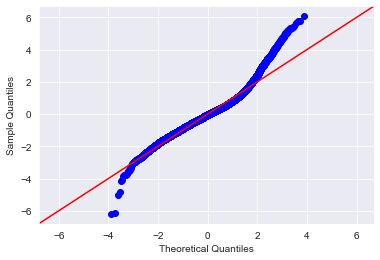

In [219]:
tt_split(model4, model4.drop('price', axis=1))

The final model predicts test data better than its training data 

### Exploring Bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

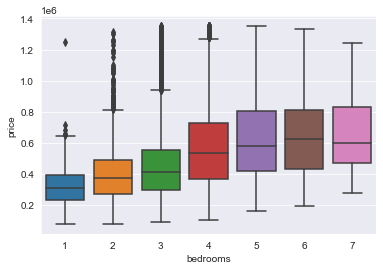

In [220]:
sns.boxplot(x='bedrooms', y='price', data=model4)

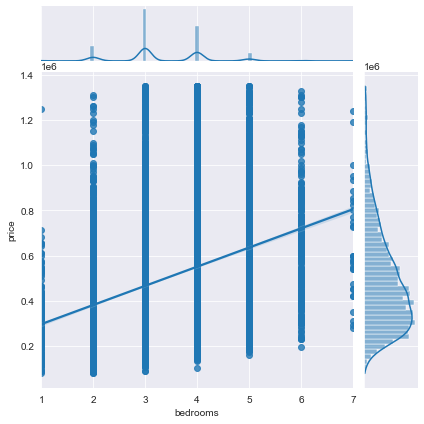

In [221]:
sns.jointplot(x='bedrooms', y='price', data=model4, kind='reg')

Based on the seemingly positive relationship between bedrooms and price in these visualizations it is difficult to discern what is causing the negative coefficient in all of the models

In [222]:
model4['bedrooms'].value_counts(normalize=True)

3    0.463457
4    0.314864
2    0.131496
5    0.068049
6    0.011430
1    0.009154
7    0.001550
Name: bedrooms, dtype: float64

nearly 80% of the properties have either 3 or 4 bedrooms, whereas 6 and 7 bedrooms make up approx 2%
- perhaps only analyzing properties properties with 1 - 5 bedrooms will adjust the coefficient 

In [223]:
model4.groupby('bedrooms').median()

,price,bathrooms,sqft_living,floors,waterfront,yr_built,yr_renovated,sqft_lot15,BELLEVUE,BLACK_DIAMOND,...,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,view_1,view_2,view_3,view_4
bedrooms,,,,,,,,,,,,,,,,,,,,,
1,306950.0,1.0,780.0,1.00,0.0,1940.0,0.0,5500.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,374950.0,1.0,1140.0,1.00,0.0,1948.0,0.0,5382.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,410000.0,2.0,1670.0,1.00,0.0,1976.0,0.0,7674.0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,531155.0,2.5,2370.0,2.00,0.0,1980.0,0.0,7909.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,579950.0,2.5,2760.0,1.50,0.0,1974.0,0.0,8346.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,622250.0,3.0,2890.0,1.50,0.0,1966.0,0.0,8238.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,598078.5,3.5,3150.0,1.75,0.0,1963.5,0.0,7970.5,0,0,...,0,0,0,0,0,0,0,0,0,0


It would appear that after 6 bedrooms, price no longer increases with the addition of an extra bedroom

In [224]:
model5 = model4[(model4['bedrooms'] < 6)]

In [225]:
summary(model5, model5.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1379.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:16:17   Log-Likelihood:            -2.6738e+05
No. Observations:               20379   AIC:                         5.348e+05
Df Residuals:                   20338   BIC:                         5.352e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.998e+06   8.65e+04     46.217      0.000    3.83e+06    4.17e+06
bedrooms      -1.136e+04   1369.853     -8.292      0.000    -1.4e+04   -8673.530
bathrooms      3.145e+04   2078.120     15.132      0.000    2.74e+04    3.55e+04
sqft_living      96.7121      2.125     45.509      0.000      92.547     100.878
floors         3.343e+04   2080.356     16.070      0.000    2.94e+04    3.75e+04
waterfront     9.629e+04   1.53e+04      6.292      0.000    6.63e+04    1.26e+05
yr_built      -2063.7888     44.504    -46.373      0.000   -2151.021   -1976.556
yr_renovated      5.8241      2.270      2.566      0.010       1.375      10.273
sqft_lot15        0.1485      0.036      4.156      0.000       0.078       0.218
BELLEVUE        2.99e+05   5202.464     57.475      0.000    2.89e+05    3.09e+05
BLACK_DIAMOND  9.248e+04   1.27e+04      7.275      0.000    6.76e+04    1.17e+05
BOTHELL        1.322e+05   9518.874     13.887      0.000    1.14e+05    1.51e+05
CARNATION      1.067e+05   1.17e+04      9.089      0.000    8.37e+04     1.3e+05
DUVALL         1.028e+05   9539.218     10.774      0.000    8.41e+04    1.21e+05
FALL_CITY      1.467e+05   1.49e+04      9.851      0.000    1.18e+05    1.76e+05
FEDERAL_WAY   -2.186e+04   5732.924     -3.812      0.000   -3.31e+04   -1.06e+04
ISSAQUAH       1.844e+05   5879.462     31.370      0.000    1.73e+05    1.96e+05
KENMORE        1.215e+05   8144.054     14.918      0.000    1.06e+05    1.37e+05
KENT           1.325e+04   5074.722      2.611      0.009    3302.605    2.32e+04
KIRKLAND       2.402e+05   5454.171     44.038      0.000    2.29e+05    2.51e+05
MAPLE_VALLEY    4.93e+04   6215.712      7.932      0.000    3.71e+04    6.15e+04
MEDINA         6.826e+05   3.67e+04     18.613      0.000    6.11e+05    7.55e+05
MERCER_ISLAND  4.278e+05   9444.694     45.295      0.000    4.09e+05    4.46e+05
NORTH_BEND     1.068e+05   8992.141     11.880      0.000    8.92e+04    1.24e+05
REDMOND        2.425e+05   5422.483     44.716      0.000    2.32e+05    2.53e+05
RENTON         7.387e+04   4781.570     15.448      0.000    6.45e+04    8.32e+04
SAMMAMISH      2.002e+05   5885.459     34.010      0.000    1.89e+05    2.12e+05
SEATTLE        1.792e+05   4044.863     44.301      0.000    1.71e+05    1.87e+05
SNOQUALMIE     1.271e+05   7936.309     16.009      0.000    1.11e+05    1.43e+05
VASHON         1.118e+05   1.23e+04      9.125      0.000    8.78e+04    1.36e+05
WOODINVILLE    1.663e+05   6803.121     24.443      0.000    1.53e+05     1.8e+05
grade_7        8.204e+04   3119.701     26.297      0.000    7.59e+04    8.82e+04
grade_8         1.59e+05   3794.310     41.908      0.000    1.52e+05    1.66e+05
grade_9        2.657e+05   4883.540     54.414      0.000    2.56e+05    2.75e+05
grade_10       3.387e+05   6471.767     52.330   

**Intepretation**
Only a small change to the negative coefficient
- I will acknowledge this relationship and the need to expore it further in the 'going forward' section of my presentation
- I will be using Model 4 as my final model

# Interpretation

<p>After four iterations, my model contains 40 features. With many features, my attention falls upon the Adjusted R² = 0.729, rather than the R² = 0.730 (small as the difference may be). With a minimum threshold of R² = 0.6, a model that attributes 72.9% of the change in property price to the 40 examined features. Of these features, all have a p-value below 0.05 (the largest being Kent = 0.011), indicating there is a less than 5% for each feature's coefficent being due to randomness. While the summary does not display the actual Prob(F-statistic) (due to its very small value), we know that it is less than 1%. This statistic gives weight to the validity of the model, as it implies that some of the parameters are nonzero values (rejecting the null hpyothesis, that all parameters are 0).</p>

<p>An important parameter to note is the coefficient of bedrooms (-$11,990). While one would expect the price of a property to increase as the number of bedrooms increases, this is not the case according to this data. While there is a chance this may be a novel phenomenon to properties in King County, it is significant grounds to further examination with more data.</p>

<p>Another interesting parameter with a negative coefficient is yr_built (-$2,053.08$). This informs us that for every year closer to the present date that a house was built (2015 for this data), the price drops $2,053.08. This is not as confounding as bedrooms having a negative coefficient, as it is very possible that older houses are worth more due to a variety of reasons (historical significance, style of architecture, etc.).</p>

# Going Forward

## Recommendations 

With the insight the model has given regarding the relationship between price and a variety of property characteristics, King Property Services should consider the following while trying to accomodate the budget restrictions and lifestyles of recent graduates:

- Properties with newer homes 
- Grade 7 properties 
- Properties with lesser views (1 or 2 out of 4)
- Properties without waterfront status
- Properties not in Medina, Mercer Island, and Bellevue


## Further Investigation